In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Assign colum names to the dataset
names = ['sample', 'thickness', 'uc_size', 'uc_shape', 'adhesion', 'epithelial', 'bare_nuclei',
         'chromatin', 'norm_nucleoli','mitoses','outcome']

# Read dataset to pandas dataframe
cancer = pd.read_csv('data/breast-cancer-wisconsin.data', names=names) 

In [4]:
cancer.drop('sample', axis=1, inplace=True)


In [5]:
cancer.bare_nuclei.replace('?',1,inplace=True)


In [6]:
cancer.bare_nuclei = cancer.bare_nuclei.astype(int)


In [7]:
# replace 2 -> 0 (meaning benign), 4 -> 1 (meaning maligant)
cancer.outcome.replace(2,0,inplace=True)
cancer.outcome.replace(4,1,inplace=True)

In [8]:
#gather up names of all the columns
cols = cancer.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'outcome'
feature_cols = [c for c in cols if c != prediction_col]

x = cancer[feature_cols].values
y = cancer[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

#gathering the predictions
preds = model.predict(x_test)

In [10]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, preds))

0.970183738585103


In [19]:
from sklearn.model_selection import cross_val_score, cross_val_predict

lr_proba = cross_val_predict(model, x_train, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]
print(f'Logistic regration prediction shape: {lr_proba.shape}')
print(f'Logistic regration score shape: {lr_scores.shape}')

for i in range(5):
    print(lr_scores[i])

Logistic regration prediction shape: (489, 2)
Logistic regration score shape: (489,)
0.9991246816950732
0.9945717027321445
0.003597263343754587
0.9999629764241311
0.9999922456067712


In [21]:
def ROC_Curve(title, y_train, scores, label=None):
    from sklearn.metrics import roc_curve
    
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()
    print(thresholds)

AUC Score (Wisconsin Breat Cancer Demo): 0.99 


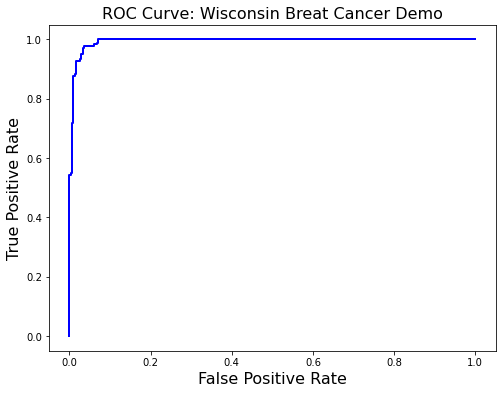

[1.99999995e+00 9.99999954e-01 9.98027743e-01 9.97964815e-01
 9.97936566e-01 9.97870867e-01 9.89539462e-01 9.87522400e-01
 9.00003722e-01 8.98304225e-01 8.97136500e-01 8.92766894e-01
 7.74567658e-01 6.56496474e-01 5.65718913e-01 5.59053765e-01
 4.48247012e-01 4.14974863e-01 2.51000001e-01 2.46825051e-01
 2.22363679e-01 9.44475172e-02 8.88819795e-02 8.41044781e-02
 8.27430620e-02 7.31069884e-02 5.63979662e-02 2.03221724e-02
 1.96198524e-02 1.60085832e-02 1.58299052e-02 1.46665826e-02
 1.38605192e-02 1.32853198e-02 1.30553078e-02 1.04072044e-02
 1.03058466e-02 1.00978396e-02 9.91007861e-03 9.67030658e-03
 9.32547563e-03 8.18141164e-03 8.16447509e-03 7.71559157e-03
 7.51681357e-03 7.31896729e-03 7.30713635e-03 6.95716794e-03
 6.92015350e-03 6.84350468e-03 6.79960047e-03 6.79902110e-03
 6.47936008e-03 6.19013433e-03 6.11898933e-03 5.79581143e-03
 5.59879160e-03 5.34825284e-03 5.17640244e-03 5.09640484e-03
 4.98690277e-03 4.95361023e-03 4.91049788e-03 4.90170517e-03
 4.75938231e-03 4.641517

In [22]:
ROC_Curve('Wisconsin Breat Cancer Demo',y_train,lr_scores)
